In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.linear_model import LinearRegression


# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [5]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]}) 

Draw a dispersion diagram (scatter plot) for the data.

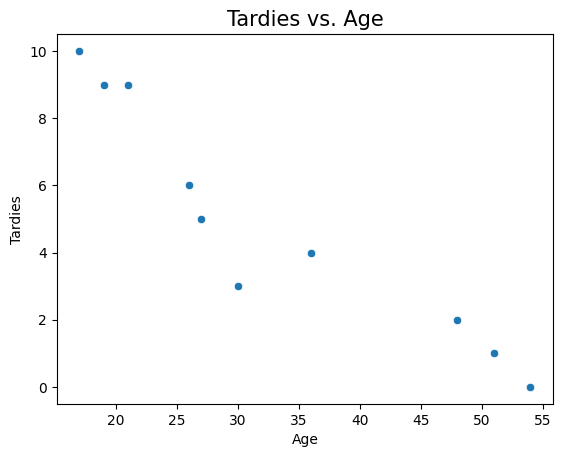

In [13]:
sns.scatterplot(y = student_data.Tardies, x=student_data.Age)
plt.title("Tardies vs. Age", size=15);


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
"""Yes, there is a noticeable trend. It appears that older students tend to be more punctual, while younger students tend to be more frequently late."""

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [14]:
student_data.cov()

"""Covariance measures the degree to which two variables change together. A positive covariance indicates that when one variable increases,
the other tends to increase, while a negative covariance suggests that when one variable increases, the other tends to decrease.

In this case, it means that, on average, as Age increases, Tardies tend to decrease, and vice versa."""

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [15]:
student_data.corr()

"""Correlation measures the linear relationship between two variables.

As age increases, students tend to be more punctual, and as age decreases, they tend to be more frequently late."""

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [18]:
# Defining X and y
X = student_data[["Age"]]
y = student_data.Tardies


# Choosing a model: lr
lr = LinearRegression()

# Fitting/Training the model
lr.fit(X, y) 

"""the outcome variable (dependent variable) is y, which is represented by student_data.Tardies
I'm using a Linear Regression"""

LinearRegression()

Plot your regression model on your scatter plot.

In [23]:
student_data["prediction_tardies"] = student_data.Age * lr.coef_[0] + lr.intercept_

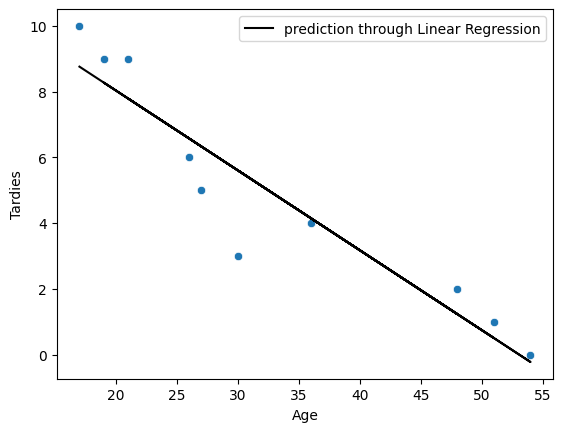

In [27]:
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)
plt.plot(student_data.Age, student_data["prediction_tardies"], c="black", label="prediction through Linear Regression")
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
"The model indicates a negative correlation between age and tardiness."

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [28]:
v = pd.read_csv('vehicles.csv')

In [31]:
# Renaming some columns

v.columns = v.columns.str.replace(' ', '_')
v.columns = v.columns.str.replace('/', '_')

In [35]:
# Calculate correlation matrix for the specified variables and the outcome variable.
correlation_matrix = v[['Year', 'Cylinders', 'Fuel_Barrels_Year', 'Combined_MPG', 'Fuel_Cost_Year', 'CO2_Emission_Grams_Mile']].corr()

# Extract the correlations with the outcome variable 'CO2_Emission_Grams_Mile'.
co2_correlations = correlation_matrix['CO2_Emission_Grams_Mile'].sort_values(ascending=False)


In [39]:
# Calculate the variable with the highest absolute correlation with 'CO2_Emission_Grams_Mile'
highest_correlation = co2_correlations.abs().idxmax()

# Print the variable name and its correlation with 'CO2_Emission_Grams_Mile'
print(f"The variable with the highest correlation with CO2 emissions is {highest_correlation} with a correlation coefficient of {co2_correlations[highest_correlation]:.2f}")

The variable with the highest correlation with CO2 emissions is CO2_Emission_Grams_Mile with a correlation coefficient of 1.00


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [43]:
# Define the features (independent variables) and the target (dependent variable).
X = v[['Year', 'Cylinders', 'Fuel_Barrels_Year', 'Combined_MPG', 'Fuel_Cost_Year']]
y = v['CO2_Emission_Grams_Mile']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Linear Regression model.
model = LinearRegression()

# Fit the model to the training data.
model.fit(X_train, y_train)

# Make predictions using the testing set.
y_pred = model.predict(X_test)

# Calculate the performance metrics of the model.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the coefficients of the model and the performance metrics.
print(f"Coefficients: \n{model.coef_}")
print(f"Mean squared error: {mse:.2f}")
print(f"Coefficient of determination (R^2): {r2:.2f}")

# This is a Multiple Linear Regression model because it uses several independent variables to predict a continuous outcome variable.
# The R^2 value indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [46]:
# Define the features (independent variables) and add a constant term for the intercept.
X = v[['Year', 'Cylinders', 'Fuel_Barrels_Year', 'Combined_MPG', 'Fuel_Cost_Year']]
X = sm.add_constant(X)

# Define the target (dependent variable).
y = v['CO2_Emission_Grams_Mile']

# Fit the Ordinary Least Squares (OLS) model.
model = sm.OLS(y, X).fit()

summary = model.summary()
print(summary)

# The model's R-squared value indicates how much of the variability in CO2 emissions is explained by the model.
# Variables with p-values less than 0.05 are typically considered statistically significant.
# Based on the coefficients, 'Fuel_Barrels_Year' seems to have the most significant impact on CO2 emissions per mile.
# A positive coefficient means that as the feature increases, the predicted value of CO2 emissions also increases.
# A negative coefficient indicates an inverse relationship.
# The confidence in these conclusions depends on the p-values, the confidence intervals of the coefficients, and the R-squared value.


                               OLS Regression Results                              
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                             16:24:49   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 